In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [43]:
# Prettier plots
%config InlineBackend.figure_format = 'svg'

sns.set_context("notebook")
sns.set(style="ticks", font="Latin Modern Math")

In [50]:
datapath = "../datasett/fifa-20-complete-player-dataset/players_20.csv"
player_data_all = pd.read_csv(datapath)
player_data_all.sort_values('overall');
player_data = player_data_all.iloc[:, [2, 10, 18, 31, 32, 33, 34, 35, 36]]
# Remove goalkeepers :(
player_data = player_data.dropna();

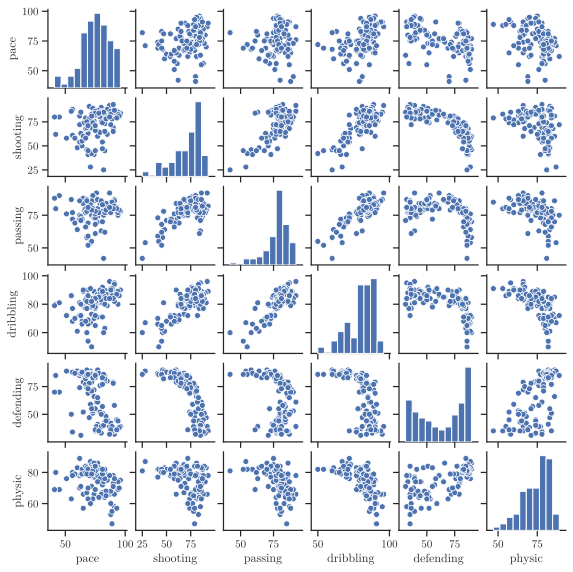

In [55]:
top_player_data = player_data.iloc[0:99, :]
sns.pairplot(top_player_data.loc[:, ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']], height=1.3, aspect=1)

In [51]:
player_data_num = player_data.loc[:, ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
player_data_std = (player_data_num-player_data_num.mean(axis=0))/player_data_num.std(axis=0,ddof=1)

In [52]:
pca = PCA()
pca.fit(player_data_std)
P=pca.components_
T = player_data_std.dot(P.T)

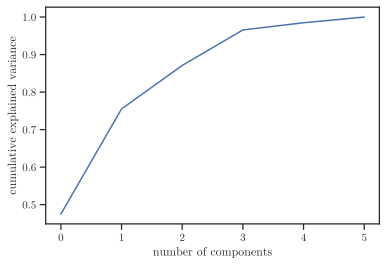

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [48]:
print("First component ", P.T[:,0])

First component  [-0.21826031 -0.26966794 -0.43941247 -0.39043351 -0.47520241  0.42353624
  0.35905393]
